# Volume 4: Timber Harvest
    <Name>
    <Class>
    <Date>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def initialize_all(y0, t0, t, n):
    """ An initialization routine for the different ODE solving
    methods in the lab. This initializes Y, T, and h. """
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size)).squeeze()
    else:
        Y = np.empty(n)
    
    Y[0] = y0
    T = np.linspace(t0, t, n)
    h = float(t - t0) / (n - 1)
    return Y, T, h

def RK4(f, y0, t0, t, n):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y' = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    
    y0 is assumed to be either a constant or a one-dimensional numpy array.
    t and t0 are assumed to be constants.
    f is assumed to accept three arguments.
    The first is a constant giving the value of t.
    The second is a one-dimensional numpy array of the same size as y.
    The third is an index to the other arrays.
    
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of np.linspace(t0, t, n).
    """
    Y,T,h = initialize_all(y0,t0,t,n)
    for i in range(n-1):
        K1 = f(T[i],Y[i],i)
        K2 = f(T[i]+h/2.,Y[i]+h/2.*K1,i)
        K3 = f(T[i]+h/2.,Y[i]+h/2.*K2,i)
        K4 = f(T[i+1],Y[i]+h*K3,i)
        Y[i+1] = Y[i] + h/6.*(K1+2*K2 +2*K3+K4)
    return Y

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [12]:
def solve_tree_harvest(x0, k, r, T, N=1000, delta=0.001):
    """
    Solves for the optimal control for the tree harvesting problem 
    with the given parameters.
    
    Parameters:
        x0 - initial amount of timber being produced
        k - investment growth rate
        r - interest rate
        T - final time
        N - number of time steps
        delta - error tolerance for convergence
    Returns:
        t ((N+1), ndarray) - timesteps
        x ((N+1), ndarray) - timber production values
        u ((N+1), ndarray) - the optimal control
    """
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    
    x = np.zeros(N+1)
    alpha = np.zeros(N+1)
    u = np.zeros(N+1)

    
    while True:
        oldx = x.copy()
        oldalpha = alpha.copy()
        oldu = u.copy()
        
        # Solve for x (iterate through each t (x[t])) (1.2)
        def ode(t, x, i):
            return k*x*u[i]
        
        x = RK4(ode, x0, 0, T, N+1)
        
        # Solve for alpha (iterate backwords through each t (alpha[t])) (1.5)
        def ode_alpha(t, alpha, i):
            return u[-1-i] * (np.exp(-r*(t)) - k * alpha) - np.exp(-r * t)
        
        alpha = RK4(ode_alpha, 0, T, 0, N+1)[::-1]

        # Solve for u (iterate through each t u[t]) (1.6 and right below)
        phi = x * (k * alpha - np.exp(-r * t))
        u = 1. * (phi > 0)
        
        # Check for convergence
        if (np.sum(np.abs(oldu - u)) < delta*np.sum(np.abs(u))
            and np.sum(np.abs(oldx - x)) < delta*np.sum(np.abs(x))
            and np.sum(np.abs(oldalpha - alpha)) < delta*np.sum(np.abs(alpha))):
            break
    return t, x, u

# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


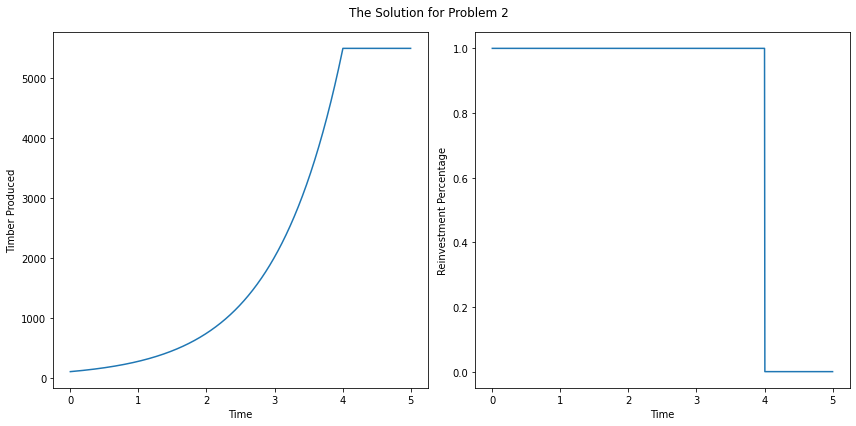

In [18]:
# Parameters for the tree harvesting problem
x0 = 100.
k = 1.
r = 0. 
T = 5. 

# Solve the tree harvesting problem
t, x, u = solve_tree_harvest(x0, k, r, T, N=1000, delta=0.001)

# Plot the solution
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Timber Produced')

plt.subplot(122)
plt.plot(t, u)
plt.xlabel('Time')
plt.ylabel('Reinvestment Percentage')

plt.suptitle('The Solution for Problem 2')
plt.tight_layout()
plt.show()

# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

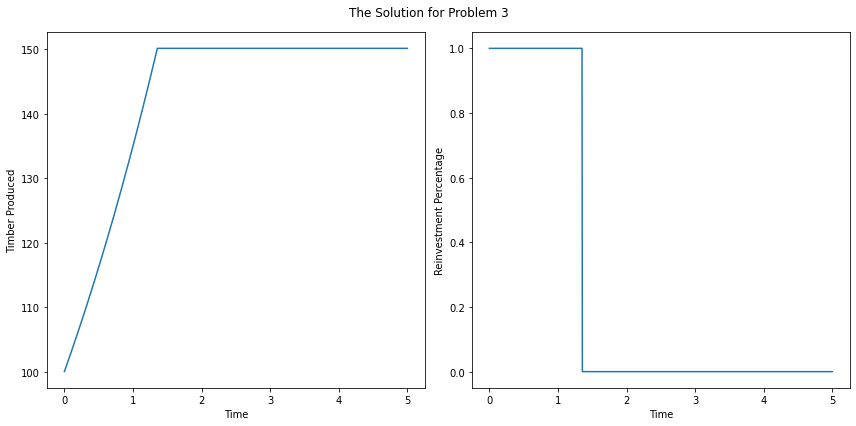

In [27]:
# Parameters for the tree harvesting problem
x0 = 100.
k = 0.3
r = 0.05
T = 5. 

# Solve the tree harvesting problem
t, x, u = solve_tree_harvest(x0, k, r, T, N=1000, delta=0.001)

# Plot the solution
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Timber Produced')

plt.subplot(122)
plt.plot(t, u)
plt.xlabel('Time')
plt.ylabel('Reinvestment Percentage')

plt.suptitle('The Solution for Problem 3')
plt.tight_layout()
plt.show()

It switches at t=1.25. 

# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


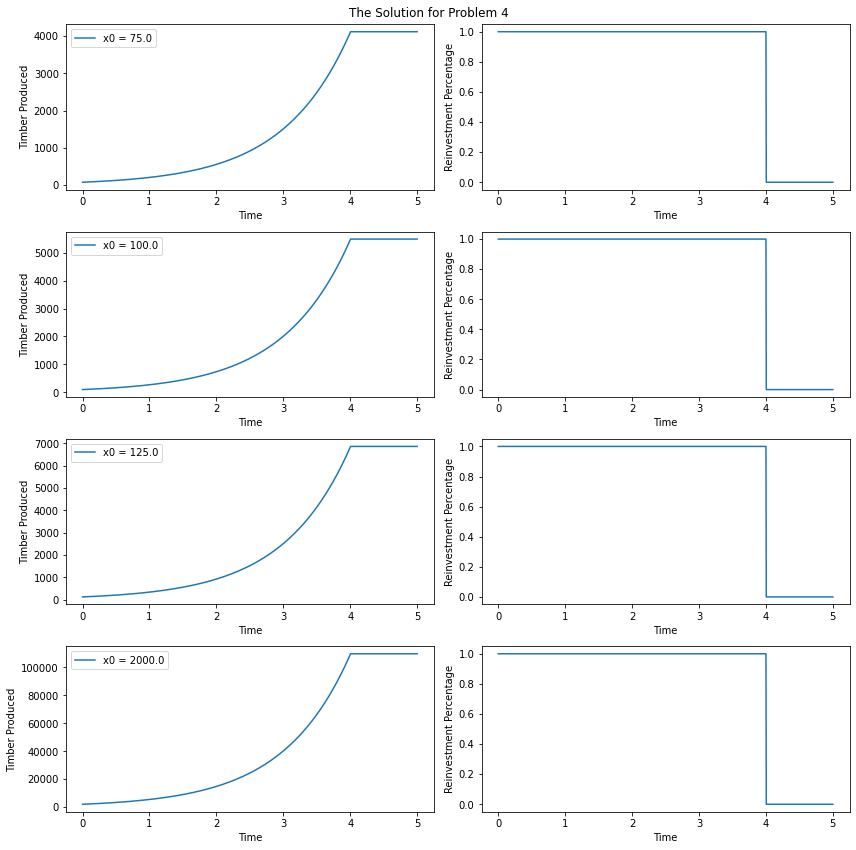

In [32]:
plt.figure(figsize=(12, 12))

for i, x0 in enumerate([75., 100., 125., 2000.]):  # Use different initial values
    # Parameters for the tree harvesting problem
    k = 1.
    r = 0. 
    T = 5. 

    # Solve the tree harvesting problem
    t, x, u = solve_tree_harvest(x0, k, r, T, N=1000, delta=0.001)

    # Plot the solution
    plt.subplot(4, 2, 2*i + 1)
    plt.plot(t, x, label='x0 = {}'.format(x0))
    plt.xlabel('Time')
    plt.ylabel('Timber Produced')
    plt.legend()

    plt.subplot(4, 2, 2*i + 2)
    plt.plot(t, u)
    plt.xlabel('Time')
    plt.ylabel('Reinvestment Percentage')

plt.suptitle('The Solution for Problem 4')
plt.tight_layout()
plt.show()

Notice that the timber produced is scaled differently depending on the initial conditions but the optimal reinvestment strategy is always the same. 